The objective of this excercise is to count the dots in the image. To do that, I'm going to use threshold filters to clear the image of color, and mathemetic morphology to open up or close the space between the dots 

In [1]:
from skimage import data
from skimage import transform as tf
from skimage.feature import (match_descriptors, corner_peaks, corner_harris,
                             plot_matches, BRIEF, ORB)
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

In [17]:
from skimage.morphology import erosion, dilation, opening, closing

from skimage.morphology import disk, diamond, square, rectangle

In [3]:
import matplotlib.pyplot as plt

from skimage import data
from skimage.filters import threshold_otsu, threshold_local, threshold_niblack, threshold_sauvola

from skimage.morphology import label
from skimage.measure import regionprops

In [4]:
# function to display de image
def imshow(img):
    fig, ax = plt.subplots(figsize=(7, 7))
    ax.imshow(img,cmap=plt.cm.gray)
    ax.set_xticks([]), ax.set_yticks([])
    plt.show()

## Load the image

In [5]:
pintura_puntos = rgb2gray(data.imread('img/Pintura_Puntos.jpg'))

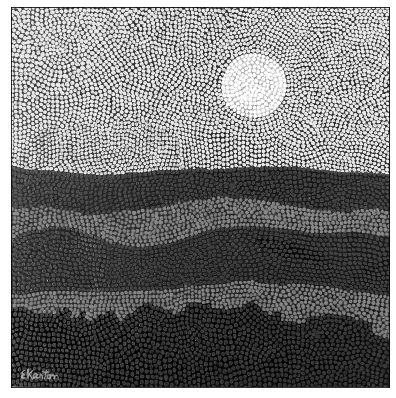

In [6]:
imshow(pintura_puntos)

## 1. Umbralization

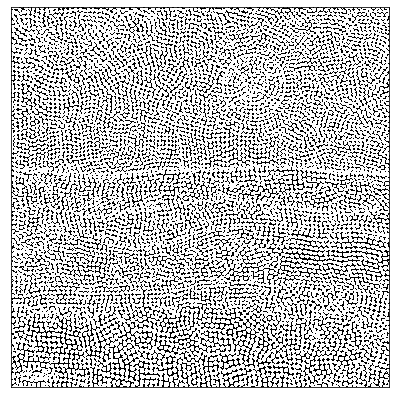

In [7]:
# threshold_niblack
binary_image1 = pintura_puntos > threshold_niblack(pintura_puntos, window_size=27, k=0.9)
func = lambda arr: arr.mean()
binary_image_niblack = pintura_puntos > threshold_niblack(pintura_puntos, window_size=27, k=0.9)
imshow(binary_image_niblack)

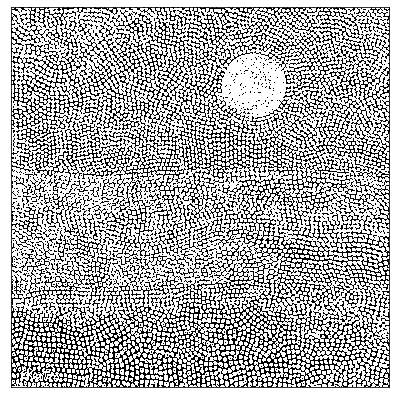

In [8]:
# threshold_sauvola
binary_image1 = pintura_puntos > threshold_sauvola(pintura_puntos, window_size=15, k=0.2, r=0.5)
func = lambda arr: arr.mean()
binary_image_sauvola = pintura_puntos > threshold_sauvola(pintura_puntos, window_size=15, k=0.2, r=0.5)
imshow(binary_image_sauvola)

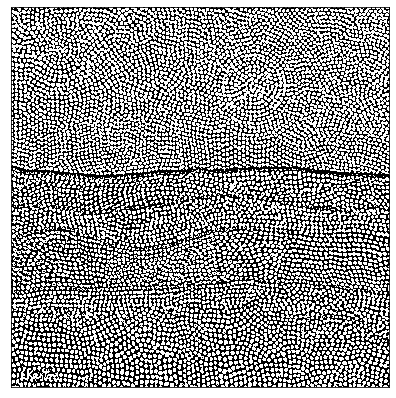

In [9]:
# Threshold local
binary_image1 = pintura_puntos > threshold_local(pintura_puntos, 37, 'mean')
func = lambda arr: arr.mean()
binary_image_local = pintura_puntos > threshold_local(pintura_puntos, 37, 'generic', param=func)
imshow(binary_image_local)

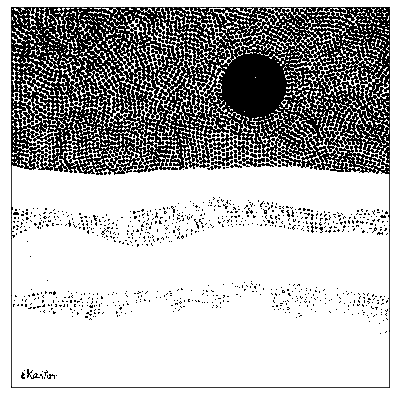

In [10]:
# Threshold Otsu

thresh = threshold_otsu(pintura_puntos)
binary_otsu = pintura_puntos <= thresh
imshow(binary_otsu)

After seeing this results, we will keep going with threshold local and niblack, since they are the ones that give the higher number of dots so far

## 2. Label/regionprops - count the number of elements in the image

In [11]:
# Label regions
objetos_local = regionprops(label(binary_image_local, connectivity=1))
objetos_niblack = regionprops(label(binary_image_niblack, connectivity=1))

print("Number of dots with threshold local: " + str(len(objetos_local)))
print("Number of dots with threshold niblack: " + str(len(objetos_niblack)))

Number of dots with threshold local: 5489
Number of dots with threshold niblack: 1350


We'll proceed to do the mathematic morphology operation with the local threshold image because it contains more dots

## 3. Mathematic morphology (opening/closing)

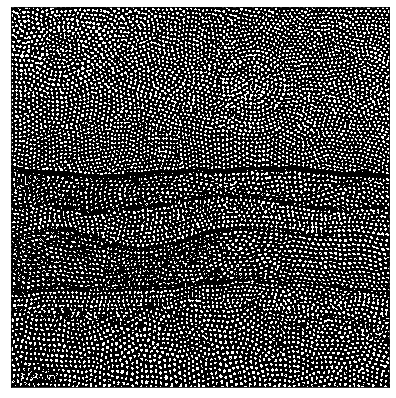

8277


In [12]:
image_tras_opening = erosion(binary_image_local, diamond(3))
imshow(image_tras_opening)
print(len(regionprops(label(image_tras_opening, connectivity=1))))

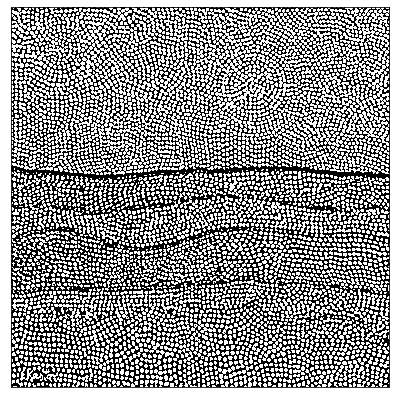

6159


In [13]:
image_tras_opening = opening(binary_image_local, disk(3))
imshow(image_tras_opening)
print(len(regionprops(label(image_tras_opening, connectivity=1))))

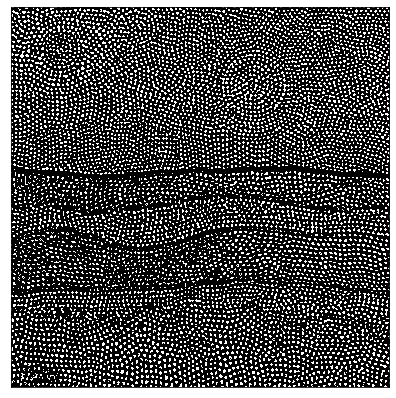

8198


In [14]:
image_tras_opening = erosion(binary_image_local, disk(3))
imshow(image_tras_opening)
print(len(regionprops(label(image_tras_opening, connectivity=1))))

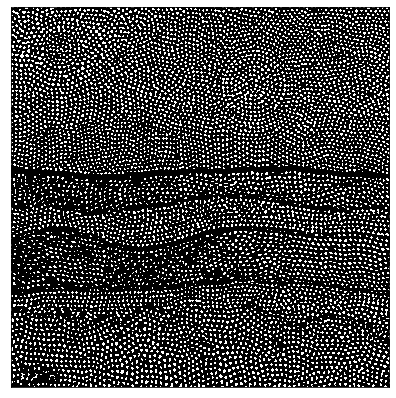

7468


In [15]:
image_tras_opening = erosion(binary_image_local, disk(3))
image_tras_opening = opening(image_tras_opening, disk(2))
imshow(image_tras_opening)
print(len(regionprops(label(image_tras_opening, connectivity=1))))

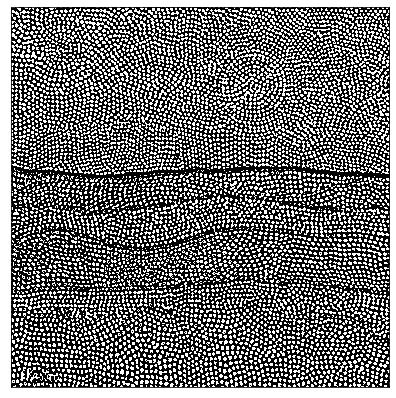

6349


In [20]:
image_tras_opening = erosion(binary_image_local, square(3))
imshow(image_tras_opening)
print(len(regionprops(label(image_tras_opening, connectivity=1))))

After trying out different methods, we see that we get the best results using **erosion**, which results in shrinking clear regions and enlarges dark regions. In addition, we can get a clearer image using an **opening**, which is the result of performing an erosion followed by a dilation

Note that the best operators are the diamond and the disk, which give us results above 8000 nad 7000 respectively. Other operators like the square seem to not perform so well in this exercise